# Import Dataset

In [2]:
from google.colab import files
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Upload stock returns file
uploaded = files.upload()

Saving influencers_combined.csv to influencers_combined.csv


In [4]:
df = pd.read_csv('influencers_combined.csv')
df.head()

reviewTime  overall  verified  ... word_youtube word_zero word_zoom
0  2016-07-14      4.0         1  ...          0.0       0.0       0.0
1  2015-08-21      5.0         0  ...          0.0       0.0       0.0
2  2016-02-05      5.0         1  ...          0.0       0.0       0.0
3  2016-04-28      4.0         1  ...          0.0       0.0       0.0
4  2016-09-25      5.0         0  ...          0.0       0.0       0.0

[5 rows x 1729 columns]

#Random Forest

In [0]:
df1 =df.drop(df.columns[[0, 3,4,5,6,7,8,10,12,15,16]], axis=1)
df1.set_index('influencer', inplace= True)
df1.reset_index(inplace=True)
df = df1[df1.columns[0:12]]

In [172]:
df.head()

influencer  overall  verified  image  ...    pos  compound  nb_chars  nb_words
0           1      4.0         1      1  ...  0.141    0.9874      3387       574
1           1      5.0         0      0  ...  0.160    0.9993      5203       862
2           1      5.0         1      1  ...  0.153    0.9986      4910       872
3           1      4.0         1      1  ...  0.103    0.9973      7891      1408
4           1      5.0         0      0  ...  0.113    0.9995     10825      1973

[5 rows x 12 columns]

In [0]:
#Add label
labels = np.array(df['influencer'])
# Remove the labels from the features
# axis 1 refers to the columns
df = df.drop('influencer', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

In [0]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [175]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (750, 11)
Training Labels Shape: (750,)
Testing Features Shape: (250, 11)
Testing Labels Shape: (250,)


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [177]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.19 degrees.


In [178]:
# Calculate MSE
MSE = (sum(errors - test_labels)/len(test_labels))**2
MSE
print('Mean Squared Error:', MSE)


Mean Squared Error: 0.08716193382399996


In [186]:
print(f'Model Accuracy: {rf.score(test_features, test_labels)}')

Model Accuracy: 0.5649395811987704


In [189]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: nb_chars             Importance: 0.59
Variable: image                Importance: 0.09
Variable: compound             Importance: 0.06
Variable: nb_words             Importance: 0.06
Variable: neu                  Importance: 0.04
Variable: pos                  Importance: 0.04
Variable: Month                Importance: 0.03
Variable: Weekday              Importance: 0.03
Variable: neg                  Importance: 0.03
Variable: overall              Importance: 0.02
Variable: verified             Importance: 0.0


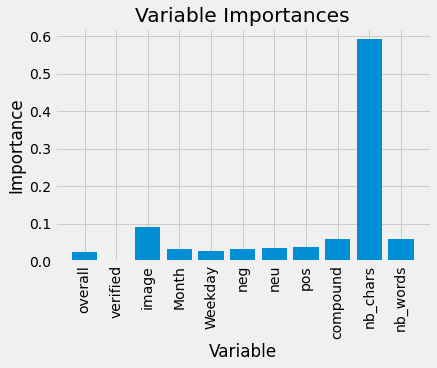

In [196]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks

%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [197]:
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_list,
                class_names = labels,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


from IPython.display import Image
Image(filename = 'tree.png')

#Logistic Regression


In [0]:
df = pd.read_csv('influencers_combined.csv')
df1 =df.drop(df.columns[[0, 3,4,5,6,7,8,10,12,15,16]], axis=1)
df1.set_index('influencer', inplace= True)
df1.reset_index(inplace=True)
df1=df1[df1.columns[0:12]]

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df1.head()

influencer  overall  verified  image  ...    pos  compound  nb_chars  nb_words
0           1      4.0         1      1  ...  0.141    0.9874      3387       574
1           1      5.0         0      0  ...  0.160    0.9993      5203       862
2           1      5.0         1      1  ...  0.153    0.9986      4910       872
3           1      4.0         1      1  ...  0.103    0.9973      7891      1408
4           1      5.0         0      0  ...  0.113    0.9995     10825      1973

[5 rows x 12 columns]

In [0]:
features = list(df1.columns[1:12]) 
X = df1[features]
y=df1['influencer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
predictions = logreg.predict(X_test)

In [205]:
metrics.accuracy_score(y_test,predictions)

0.895

In [11]:
score = logreg.score(X_test, y_test)
print(score)

0.876


In [0]:
importance = logreg.coef_[0]

In [25]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.14516
Feature: 1, Score: -0.56169
Feature: 2, Score: 2.64985
Feature: 3, Score: -0.01221
Feature: 4, Score: -0.04542
Feature: 5, Score: -0.05968
Feature: 6, Score: -0.01226
Feature: 7, Score: -0.49525
Feature: 8, Score: 0.23309
Feature: 9, Score: 0.00271
Feature: 10, Score: -0.00642


In [26]:
from prettytable import PrettyTable   
x = PrettyTable()

column_names = ["Variable","Coefficiency"]

x.add_column(column_names[0], features)
x.add_column(column_names[1], importance) 
print(x)

+----------+------------------------+
| Variable |      Coefficiency      |
+----------+------------------------+
| overall  |  -0.14516262427316068  |
| verified |  -0.5616851945029869   |
|  image   |   2.649848103295815    |
|  Month   | -0.012205696996266275  |
| Weekday  |  -0.04542333598267026  |
|   neg    | -0.059675822171955155  |
|   neu    |  -0.01226121705080832  |
|   pos    |  -0.49525003414496566  |
| compound |   0.2330904391158446   |
| nb_chars |  0.002705593172999704  |
| nb_words | -0.0064214398522966475 |
+----------+------------------------+


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


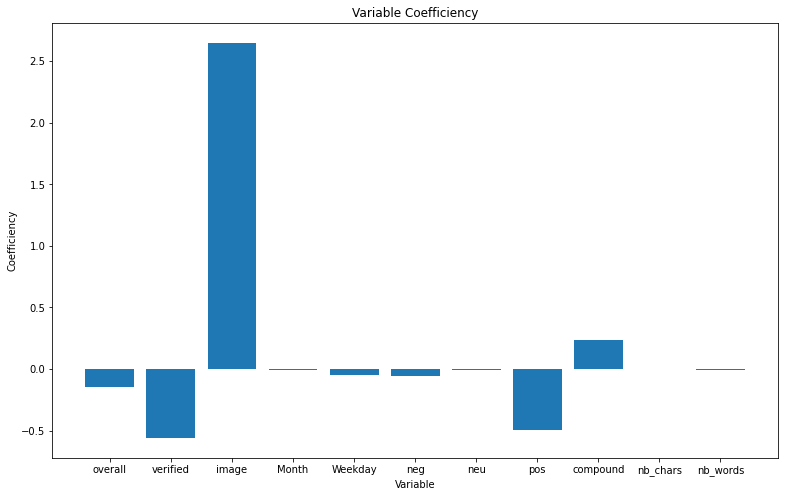

In [19]:
plt.figure(figsize=(13,8),facecolor="white")
plt.bar(features, importance)
ax = plt.axes()
ax.set_facecolor("white")
#ax.grid(False)

plt.ylabel('Coefficiency'); plt.xlabel('Variable'); plt.title('Variable Coefficiency');
plt.show()

#Another Logistic Regression Approach

In [0]:
import torch
torch.cuda.is_available() 
from torch.utils.data import TensorDataset, DataLoader

In [9]:
features = list(df1.columns[1:12]) 
X = df1[features]
y=df1['influencer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(800, 11)
(200, 11)


In [0]:
class LogisticRegression():
    def __init__(self, X, y , X_test, y_test, lr,epochs, reg = False,useoptimizer = False,):
        self.X,self.y,  self.X_test,self.y_test,self.lr ,self.epochs,self.reg  = X, y , X_test, y_test, lr, epochs, reg
        self.optim = GradientDesent( X, y , X_test, y_test, lr,epochs, reg,useoptimizer, self.sigmoid)
   
    def sigmoid(self, z):    
        return 1/(1+np.exp(-z))   
    
    def fit(self):
        w = self.optim.optimize()
        h = self.sigmoid(np.dot(self.X, w))
        h_test = self.sigmoid(np.dot(self.X_test, w))
        train_preds = [1 if i > 0.5 else 0 for i in h]
        test_preds = [1 if i > 0.5 else 0 for i in h_test]
        train_accuracy =  accuracy_score(self.y , train_preds)
        test_accuracy =  accuracy_score(self.y_test , test_preds)
        
        print(f'Train Accuracy: {train_accuracy} Test Accuracy: {test_accuracy}')

In [0]:
import scipy.optimize as opt
class GradientDesent():
    
    def __init__(self, X, y , X_test, y_test, lr, epochs, reg = False, useoptimizer = False, activate_fn = None):
        self.X,self.y,  self.X_test,self.y_test,self.lr ,self.epochs, self.reg, self.useoptimizer, self.activate_fn  = X, y , X_test, y_test, lr,epochs, reg,useoptimizer,activate_fn
            
    def optimize(self):
        w = np.zeros(X.shape[1])
              
        
        if(self.useoptimizer):
            result = opt.fmin_tnc(func=self.cost, x0=w, fprime=self.gradient,args=(self.X, self.y)) 
            train_loss= self.cost(result[0], self.X, self.y)
            test_loss = self.cost(result[0], self.X_test, self.y_test)  
            print(f'Runned Spicy Optimizer > Train Loss: {train_loss} Test Loss: {test_loss}')          
            return result[0]             
            
        train_cost = np.zeros(self.epochs)
        test_cost = np.zeros(self.epochs)      

        
        for i in range(self.epochs):
            grad = self.gradient(w, self.X, self.y)
            w = np.subtract(w , np.multiply(grad , self.lr))
            train_loss= self.cost(w, self.X, self.y)
            val_loss = self.cost(w, self.X_test, self.y_test)         
            train_cost[i] = train_loss
            val_cost[i] = test_loss
            print(f'Epochs: {i} Train Loss: {train_loss} Test Loss: {test_loss}')   
            
        
        return w
        
    def cost(self,w, X, y):
        h = np.dot(X, w)
        m = len(X)       
        if(self.activate_fn != None):  h = self.activate_fn(h)
        loss= (np.dot(-y, np.log(h))) - (np.dot(1-y, np.log(1-h)))
        loss = np.sum(loss)/m
        
        if(self.reg):           
            loss = loss + ((self.lr/2*m) * np.sum(np.power(w,2)))
        return loss
            
    
    def gradient(self,w,X, y):
        h = np.dot(X, w)      
        if(self.activate_fn != None):  h = self.activate_fn(h)     
        m = len(X)
        loss= h - y
        gradient = np.dot(X.T,loss)/m
        if(self.reg): gradient = gradient + np.dot((self.lr/m), w)      
        return gradient

In [0]:
model = LogisticRegression(X_train, y_train,X_test,y_test,  lr = 0.001, epochs =1000, reg = True, useoptimizer=True)

In [79]:
model.fit()

Runned Spicy Optimizer > Train Loss: 0.6931471805599452 Test Loss: 0.6931471805599453


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


# Pytorch -- NN

In [0]:
features = list(df1.columns[1:12]) 
X = df1[features]
y=df1['influencer']
X=np.array(X,dtype='float32')
inputs=torch.from_numpy(X)
y = np.array(y,dtype='float32')
target=torch.from_numpy(y)

In [0]:
ds = TensorDataset(inputs, target)
train_ds, test_ds = train_test_split(ds, test_size=0.25, random_state=0)
train_dl = DataLoader(train_ds,batch_size=100)
test_dl = DataLoader(test_ds,batch_size=100)

In [0]:
batch_size = 100
epochs = 100
input_dim = 11
output_dim = 1
lr_rate = 0.001

In [0]:
torch.manual_seed(0)
model = torch.nn.Sequential(torch.nn.Linear(11,1),torch.nn.Sigmoid())

In [0]:
loss_function = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [108]:
n_epochs = 1000
model.train()
for epoch in range(n_epochs):
  running_loss =0 
  for X,y in train_dl: 
    optimizer.zero_grad() 
    pred = model(X)
    loss = loss_function(pred, y.view(-1,1))
    loss.backward()
    running_loss += loss.item()
    optimizer.step() 
  if epoch%100 ==99:
    pred = np.array([0 if x < 0.5 else 1 for x in pred])
    loss_value = round(running_loss/len(train_dl),2)
    accuracy = round(sum(pred == y.numpy())/len(pred)*100,1)
    print(f'Epoch:{epoch+1: <{3}}, Loss: {loss_value:<{3}},Train Accuracy:{accuracy:<{3}}%')
  for X,y in test_dl: 
    optimizer.zero_grad() 
    out = model(X)
    loss = loss_function(out, y.view(-1,1))
    loss.backward()
    running_loss += loss.item()
    optimizer.step() 
  if epoch%100 ==99:
    out = np.array([0 if x < 0.5 else 1 for x in out])
    loss_value = round(running_loss/len(test_dl),2)
    accuracy = round(sum(out == y.numpy())/len(out)*100,1)
    print(f'Epoch:{epoch+1: <{3}}, Loss: {loss_value:<{3}}, Test Accuracy:{accuracy:<{3}}%')

Epoch:100, Loss: 26.98,Train Accuracy:56.0%
Epoch:100, Loss: 95.65, Test Accuracy:62.0%
Epoch:200, Loss: 12.77,Train Accuracy:66.0%
Epoch:200, Loss: 38.55, Test Accuracy:72.0%
Epoch:300, Loss: 12.66,Train Accuracy:62.0%
Epoch:300, Loss: 39.94, Test Accuracy:72.0%
Epoch:400, Loss: 6.81,Train Accuracy:68.0%
Epoch:400, Loss: 30.17, Test Accuracy:74.0%
Epoch:500, Loss: 6.79,Train Accuracy:68.0%
Epoch:500, Loss: 30.18, Test Accuracy:72.0%
Epoch:600, Loss: 30.03,Train Accuracy:52.0%
Epoch:600, Loss: 109.83, Test Accuracy:60.0%
Epoch:700, Loss: 7.01,Train Accuracy:68.0%
Epoch:700, Loss: 30.8, Test Accuracy:70.0%
Epoch:800, Loss: 7.9,Train Accuracy:76.0%
Epoch:800, Loss: 28.6, Test Accuracy:72.0%
Epoch:900, Loss: 24.32,Train Accuracy:58.0%
Epoch:900, Loss: 85.21, Test Accuracy:66.0%
Epoch:1000, Loss: 6.17,Train Accuracy:72.0%
Epoch:1000, Loss: 24.01, Test Accuracy:72.0%
